# COLOR IMAGES

## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DL_Project')

In [ ]:
# ! pip install kaggle

In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download concaption/pepsico-lab-potato-quality-control

In [ ]:
# ! unzip pepsico-lab-potato-quality-control.zip

In [ ]:
stem_path = '/content/drive/MyDrive/DL_Project/pepsico-lab-potato-quality-control.zip (Unzipped Files)'

In [ ]:
train_nd_path = stem_path +'/Pepsico RnD Potato Lab Dataset/Train/Non-Defective/'
train_d_path = stem_path + '/Pepsico RnD Potato Lab Dataset/Train/Defective/'

test_nd_path = stem_path +'/Pepsico RnD Potato Lab Dataset/Test/Not Defective/'
test_d_path = stem_path+'/Pepsico RnD Potato Lab Dataset/Test/Defective/'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

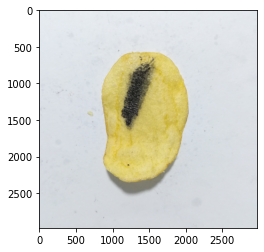

In [ ]:
defective_image = plt.imread(train_d_path + 'IMG_20210319_015024.jpg')
plt.imshow(defective_image)

In [ ]:
defective_image.shape

(2976, 2976, 3)

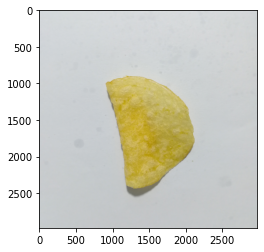

In [ ]:
non_defective_image = plt.imread(train_nd_path + 'IMG_20210318_235715.jpg')
plt.imshow(non_defective_image)

In [ ]:
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 160; 
img_width = 160;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    stem_path +'/Pepsico RnD Potato Lab Dataset/Train/',
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    stem_path +'/Pepsico RnD Potato Lab Dataset/Train/',
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)  

Found 769 files belonging to 2 classes.
Using 616 files for training.
Found 769 files belonging to 2 classes.
Using 153 files for validation.


## Check images and label

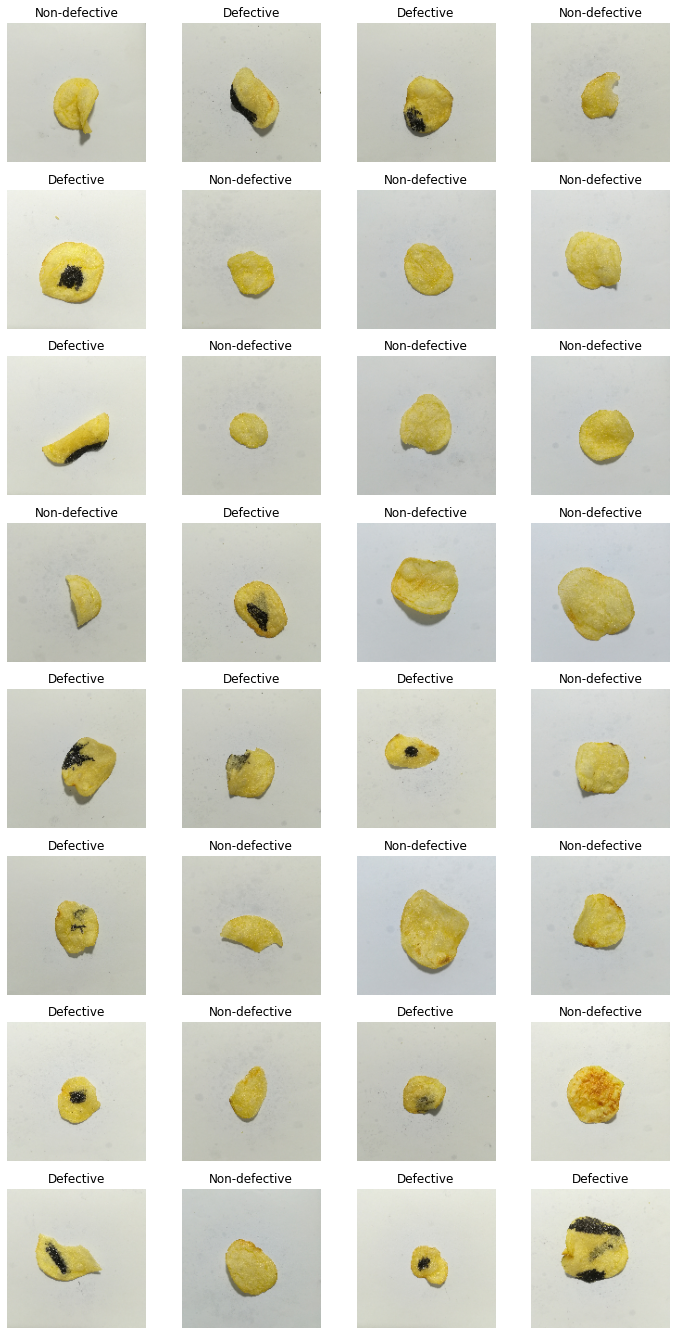

In [ ]:
class_names = ['Defective', 'Non-defective']

n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

## 1. CNN

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Rescaling
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Rescaling(1./160,input_shape=(160,160,3)))
model.add(Conv2D(16, kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=8

# Callback to save the Keras model or model weights at some frequency.
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop_cb = EarlyStopping(patience=1, restore_best_weights= True)


history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback, early_stop_cb]
)

model.load_weights(checkpoint_filepath)

Epoch 1/25
20/20 [==============================] - 22s 671ms/step - loss: 0.9525 - accuracy: 0.4854 - val_loss: 0.6919 - val_accuracy: 0.5425
Epoch 2/25
20/20 [==============================] - 21s 703ms/step - loss: 0.6952 - accuracy: 0.4919 - val_loss: 0.6898 - val_accuracy: 0.7190
Epoch 3/25
20/20 [==============================] - 21s 665ms/step - loss: 0.6696 - accuracy: 0.6494 - val_loss: 0.5459 - val_accuracy: 0.8170
Epoch 4/25
20/20 [==============================] - 20s 685ms/step - loss: 0.3780 - accuracy: 0.8912 - val_loss: 0.1704 - val_accuracy: 0.9869
Epoch 5/25
20/20 [==============================] - 20s 662ms/step - loss: 0.1005 - accuracy: 0.9740 - val_loss: 0.0554 - val_accuracy: 0.9869
Epoch 6/25
20/20 [==============================] - 20s 666ms/step - loss: 0.0681 - accuracy: 0.9805 - val_loss: 0.0317 - val_accuracy: 0.9935
Epoch 7/25
20/20 [==============================] - 20s 660ms/step - loss: 0.0464 - accuracy: 0.9886 - val_loss: 0.0293 - val_accuracy: 0.9935

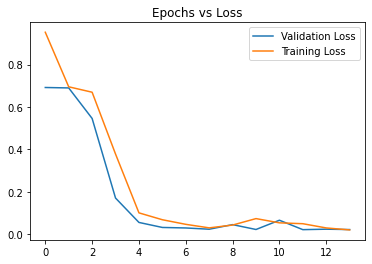

In [ ]:
values = history.history
val_loss = values['val_loss']
training_loss = values['loss']
training_acc = values['accuracy']
validation_acc = values['val_accuracy']

plt.plot(val_loss,label = 'Validation Loss')
plt.plot(training_loss,label = 'Training Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    stem_path +'/Pepsico RnD Potato Lab Dataset/Test/',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)  

Found 192 files belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

6/6 [==============================] - 16s 10ms/step - loss: 0.0339 - accuracy: 0.9948
Test accuracy : 0.9947916865348816


## 2. MobileNetV2

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (img_height, img_width) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
# Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. 
# MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
# convert the features to a single 1280-element vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
# convert these features into a single prediction per image
num_classes = 1
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False) # use training=False as our model contains a BatchNormalization layer.
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
mobile_model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10

# Callback to save the Keras model or model weights at some frequency.
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history = mobile_model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

mobile_model.load_weights(checkpoint_filepath)

Epoch 1/10
20/20 [==============================] - 26s 756ms/step - loss: 0.7976 - accuracy: 0.4870 - val_loss: 0.7077 - val_accuracy: 0.4575
Epoch 2/10
20/20 [==============================] - 21s 696ms/step - loss: 0.6401 - accuracy: 0.5682 - val_loss: 0.6034 - val_accuracy: 0.5294
Epoch 3/10
20/20 [==============================] - 21s 682ms/step - loss: 0.5929 - accuracy: 0.6169 - val_loss: 0.5461 - val_accuracy: 0.6078
Epoch 4/10
20/20 [==============================] - 21s 686ms/step - loss: 0.5448 - accuracy: 0.6558 - val_loss: 0.5000 - val_accuracy: 0.6667
Epoch 5/10
20/20 [==============================] - 20s 686ms/step - loss: 0.4891 - accuracy: 0.7435 - val_loss: 0.4615 - val_accuracy: 0.7516
Epoch 6/10
20/20 [==============================] - 21s 689ms/step - loss: 0.4480 - accuracy: 0.7776 - val_loss: 0.4275 - val_accuracy: 0.7647
Epoch 7/10
20/20 [==============================] - 22s 728ms/step - loss: 0.4154 - accuracy: 0.8084 - val_loss: 0.3981 - val_accuracy: 0.8039

In [ ]:
# Fine tune the weights of the top layers of the pre-trained model alongside the training of the classifier
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
mobile_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
mobile_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

tf.keras.callbacks.Callback()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop_cb = EarlyStopping(patience=2, restore_best_weights= True)

history_fine = mobile_model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds,
                         callbacks=[model_checkpoint_callback, early_stop_cb])


mobile_model.load_weights(checkpoint_filepath)

Epoch 10/20
20/20 [==============================] - 28s 775ms/step - loss: 0.1543 - accuracy: 0.9545 - val_loss: 0.0744 - val_accuracy: 1.0000
Epoch 11/20
20/20 [==============================] - 21s 699ms/step - loss: 0.0519 - accuracy: 0.9886 - val_loss: 0.0451 - val_accuracy: 0.9935
Epoch 12/20
20/20 [==============================] - 22s 728ms/step - loss: 0.0382 - accuracy: 0.9838 - val_loss: 0.0345 - val_accuracy: 0.9935
Epoch 13/20
20/20 [==============================] - 22s 735ms/step - loss: 0.0260 - accuracy: 0.9886 - val_loss: 0.0266 - val_accuracy: 0.9869
Epoch 14/20
20/20 [==============================] - 27s 893ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0283 - val_accuracy: 0.9935
Epoch 15/20
20/20 [==============================] - 21s 705ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.0244 - val_accuracy: 0.9935
Epoch 16/20
20/20 [==============================] - 21s 701ms/step - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.0167 - val_accuracy:

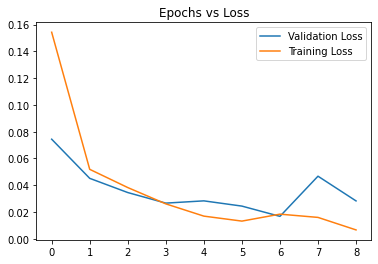

In [ ]:
values = history_fine.history
val_loss = values['val_loss']
training_loss = values['loss']
training_acc = values['accuracy']
validation_acc = values['val_accuracy']

plt.plot(val_loss,label = 'Validation Loss')
plt.plot(training_loss,label = 'Training Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = mobile_model.evaluate(test_ds)
print('Test accuracy :', accuracy)

6/6 [==============================] - 5s 22ms/step - loss: 0.0904 - accuracy: 0.9844
Test accuracy : 0.984375


# GREYSCALE IMAGES

## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/DL_Project')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
stem_path = '/content/drive/MyDrive/DL_Project'

In [ ]:
train_nd_path = stem_path +'/Pepsico RnD Potato Lab Dataset/Train/Non-Defective/'
train_d_path = stem_path + '/Pepsico RnD Potato Lab Dataset/Train/Defective/'

test_nd_path = stem_path +'/Pepsico RnD Potato Lab Dataset/Test/Not Defective/'
test_d_path = stem_path+'/Pepsico RnD Potato Lab Dataset/Test/Defective/'



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_nd_list = os.listdir(train_nd_path)
train_d_list = os.listdir(train_d_path)
test_nd_list = os.listdir(test_nd_path)
test_d_list = os.listdir(test_d_path)

In [ ]:
len(train_nd_list)

500

In [ ]:
greyscale_folder = stem_path + '/greyscale_images'
grey_test_nd = greyscale_folder + '/test/non_defective/'
grey_test_d = greyscale_folder + '/test/defective/'
grey_train_nd = greyscale_folder + '/train/non_defective/'
grey_train_d = greyscale_folder + '/train/defective/'

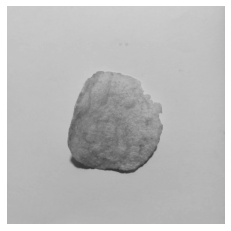

In [ ]:
img = mpimg.imread(train_nd_path+train_nd_list[0])
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.axis('off')
# plt.show()
plt.savefig(grey_train_nd+train_nd_list[0],bbox_inches='tight',dpi=300)

In [ ]:
# folders = [train_nd_list,train_d_list,test_nd_list,test_d_list]
# for image in train_nd_list:
#   img = mpimg.imread(train_nd_path+image)
#   R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
#   imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#   plt.imshow(imgGray, cmap='gray')
#   plt.axis('off')
#   plt.savefig(grey_train_nd+image)

# for image in train_d_list:
#   img = mpimg.imread(train_d_path+image)
#   R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
#   imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#   plt.imshow(imgGray, cmap='gray')
#   plt.axis('off')
#   plt.savefig(grey_train_d+image)

# for image in test_nd_list:
#   img = mpimg.imread(test_nd_path+image)
#   R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
#   imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#   plt.imshow(imgGray, cmap='gray')
#   plt.axis('off')
#   plt.savefig(grey_test_nd+image)

# for image in test_d_list:
#   img = mpimg.imread(test_d_path+image)
#   R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
#   imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#   plt.imshow(imgGray, cmap='gray')
#   plt.axis('off')
#   plt.savefig(grey_test_d+image)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 160; 
img_width = 160;

train = keras.preprocessing.image_dataset_from_directory(greyscale_folder+'/train/',\
                validation_split=0.2,subset='training',seed=2,image_size=(img_height,img_width),batch_size=batch_size,color_mode='grayscale')
val = keras.preprocessing.image_dataset_from_directory(greyscale_folder+'/train/',\
          validation_split=0.2,subset='validation',seed=2,image_size=(img_height,img_width),batch_size=batch_size,color_mode='grayscale')

Found 770 files belonging to 2 classes.
Using 616 files for training.
Found 770 files belonging to 2 classes.
Using 154 files for validation.


In [ ]:
train.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 160, 160, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
dir(train.take(1))

## Image and label check

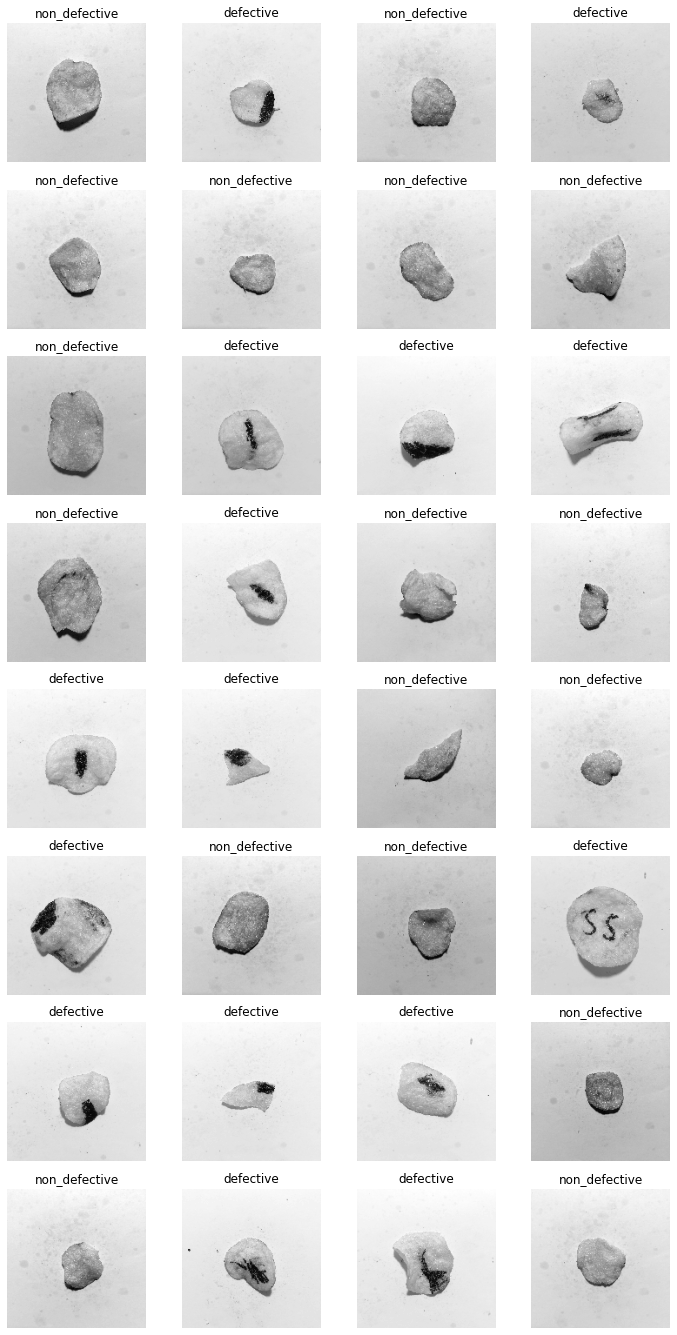

In [ ]:
import numpy as np
class_names = train.class_names

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(tf.squeeze(images[i]),cmap='gray')
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

## CNN

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Rescaling

In [ ]:
model = Sequential()
model.add(Rescaling(1./160,input_shape=(160,160,1)))
model.add(Conv2D(16, kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 64)       

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_train = model.fit(train,validation_data=val,epochs=8,verbose=1)

Epoch 1/8
20/20 [==============================] - 28s 1s/step - loss: 0.7547 - accuracy: 0.4789 - val_loss: 0.6993 - val_accuracy: 0.4286
Epoch 2/8
20/20 [==============================] - 27s 1s/step - loss: 0.6045 - accuracy: 0.6883 - val_loss: 0.3838 - val_accuracy: 0.9286
Epoch 3/8
20/20 [==============================] - 27s 1s/step - loss: 0.1221 - accuracy: 0.9821 - val_loss: 0.1041 - val_accuracy: 0.9610
Epoch 4/8
20/20 [==============================] - 27s 1s/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 0.1093 - val_accuracy: 0.9545
Epoch 5/8
20/20 [==============================] - 27s 1s/step - loss: 0.0318 - accuracy: 0.9951 - val_loss: 0.1087 - val_accuracy: 0.9675
Epoch 6/8
20/20 [==============================] - 27s 1s/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.1023 - val_accuracy: 0.9675
Epoch 7/8
20/20 [==============================] - 27s 1s/step - loss: 0.0299 - accuracy: 0.9951 - val_loss: 0.1166 - val_accuracy: 0.9675
Epoch 8/8
20/20 [==========

## Testing

In [ ]:

test = keras.preprocessing.image_dataset_from_directory(greyscale_folder+'/test/',image_size=(img_height,img_width),batch_size=batch_size,color_mode='grayscale')

Found 192 files belonging to 2 classes.


In [ ]:
loss,accuracy = model.evaluate(test)

6/6 [==============================] - 21s 11ms/step - loss: 0.0127 - accuracy: 1.0000


In [ ]:
print('accuracy: {}'.format(accuracy))
print('loss: {}'.format(loss))

accuracy: 1.0
loss: 0.012690498493611813


# GRADCAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DL_Project')

In [ ]:
train_path = '/content/drive/MyDrive/DL_Project/Pepsico RnD Potato Lab Dataset/Train/'
test_path = '/content/drive/MyDrive/DL_Project/Pepsico RnD Potato Lab Dataset/Test/'

In [ ]:
train_nd_path = train_path +'Non-Defective/'
train_d_path = train_path + 'Defective/'

test_nd_path = test_path +'Not Defective/'
test_d_path = test_path+'Defective/'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
batch_size = 32;
img_height = 150;
img_width = 150;

# Training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, 
    validation_split = 0.2, 
    subset = "training", 
    seed = 18,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

# Validation
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, 
    validation_split = 0.2, 
    subset = "validation", 
    seed = 18,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 961 files belonging to 2 classes.
Using 769 files for training.
Found 961 files belonging to 2 classes.
Using 192 files for validation.


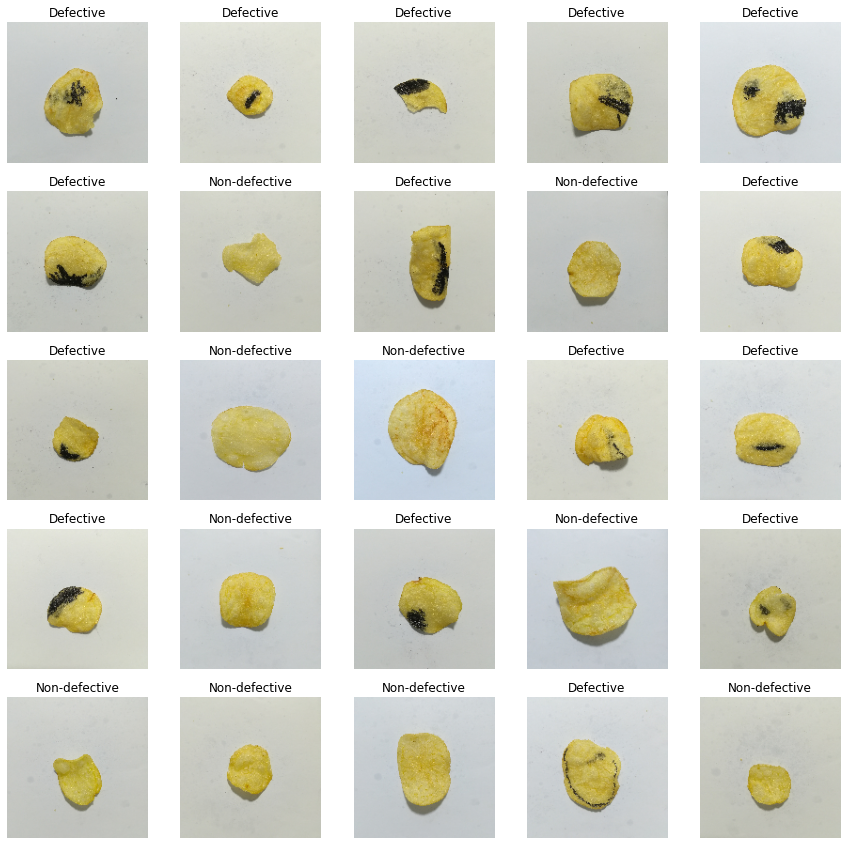

In [ ]:
class_names = ['Defective', 'Non-defective']

n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

inputs = tf.keras.Input(shape = (150,150,3))
x = data_augmentation(inputs)

x = tf.keras.layers.Rescaling(1.0 / 255)(x)
x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
 
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 75, 75, 32)        0         
                                                             

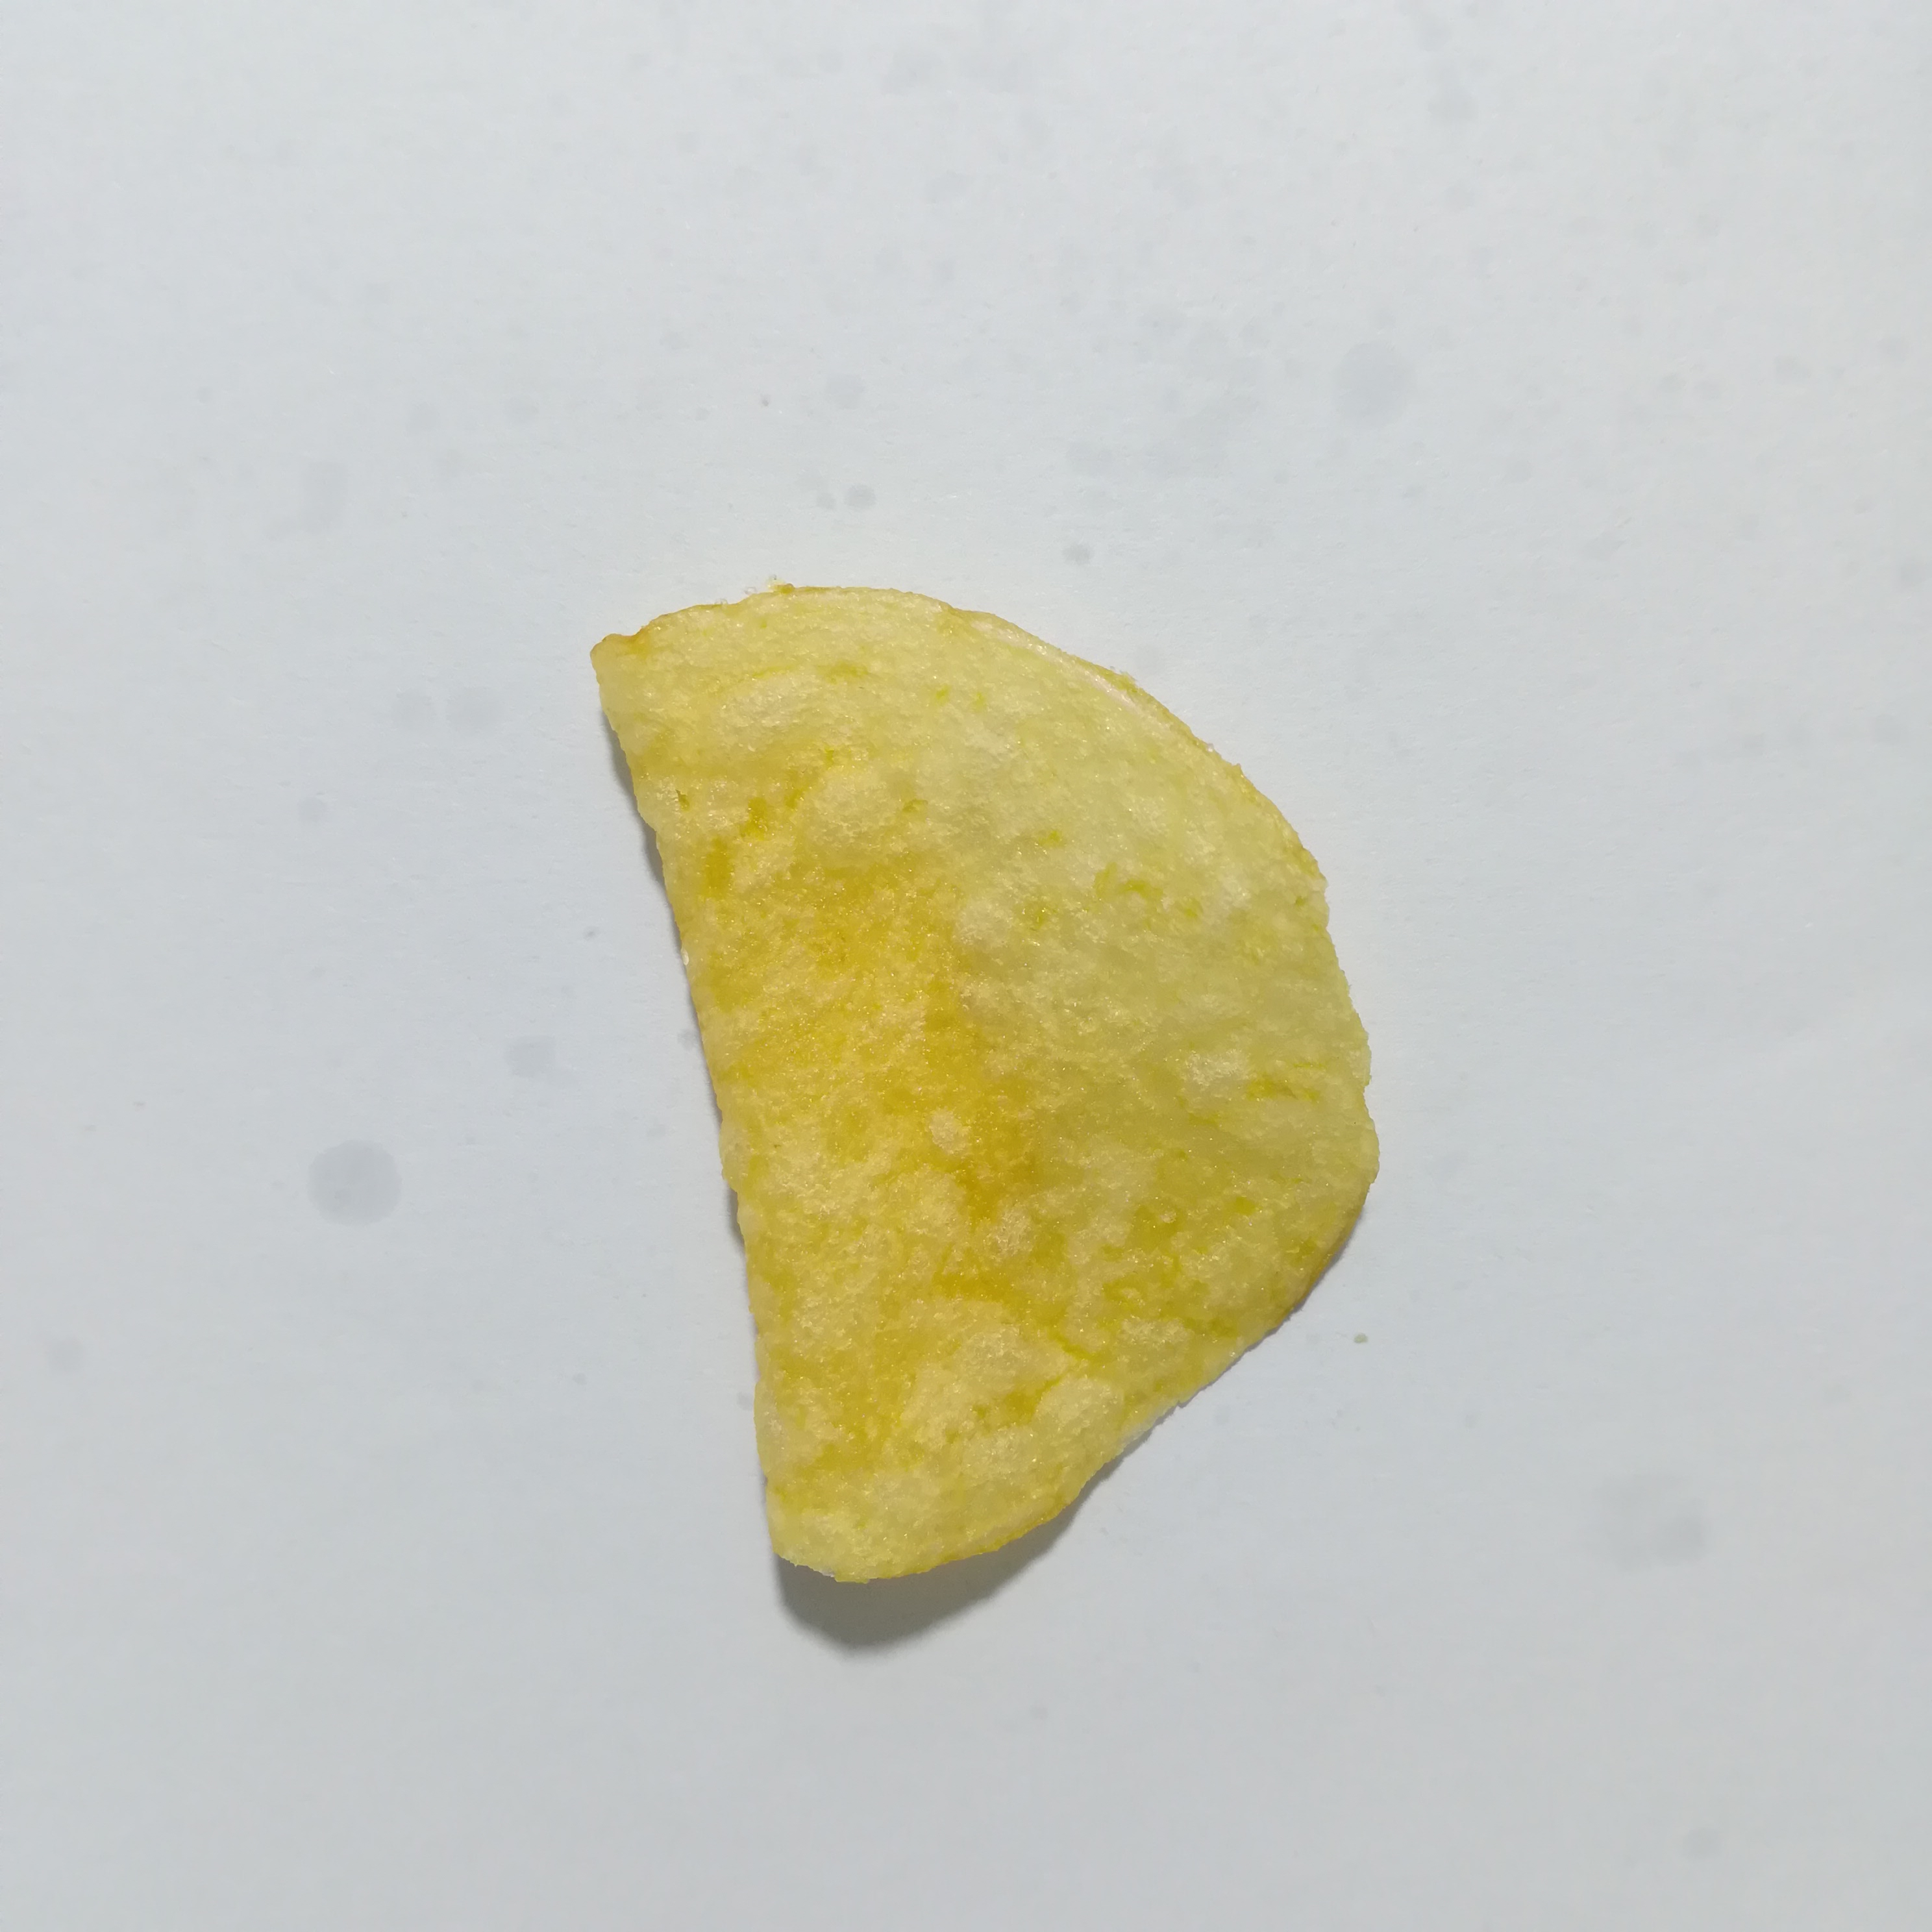

In [ ]:
img_size = (150,150)

last_conv_layer_name = "activation_1"

# The local path to our target image
img_path = train_nd_path + "IMG_20210318_235715.jpg"

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
   grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

   with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Make model
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
epochs=10

# Callback to save the Keras model or model weights at some frequency.
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/10
25/25 [==============================] - 183s 7s/step - loss: 0.5646 - accuracy: 0.7061 - val_loss: 0.9410 - val_accuracy: 0.4323
Epoch 2/10
25/25 [==============================] - 54s 2s/step - loss: 0.4525 - accuracy: 0.7919 - val_loss: 0.9430 - val_accuracy: 0.4323
Epoch 3/10
25/25 [==============================] - 53s 2s/step - loss: 0.4121 - accuracy: 0.8231 - val_loss: 0.8719 - val_accuracy: 0.4323
Epoch 4/10
25/25 [==============================] - 53s 2s/step - loss: 0.4084 - accuracy: 0.8401 - val_loss: 0.7650 - val_accuracy: 0.4323
Epoch 5/10
25/25 [==============================] - 55s 2s/step - loss: 0.3634 - accuracy: 0.8843 - val_loss: 0.6831 - val_accuracy: 0.4375
Epoch 6/10
25/25 [==============================] - 55s 2s/step - loss: 0.3543 - accuracy: 0.8622 - val_loss: 0.6495 - val_accuracy: 0.7083
Epoch 7/10
25/25 [==============================] - 56s 2s/step - loss: 0.3545 - accuracy: 0.8739 - val_loss: 0.6558 - val_accuracy: 0.5729
Epoch 8/10
25/25 [=

Predicted: Not Defective


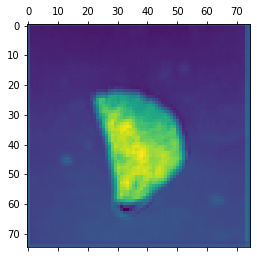

In [ ]:
# Prepare image
img_array = (get_img_array(img_path, size=img_size))

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
not_defective_pred = preds[0]
defective_pred = 1 - preds[0]
if not_defective_pred > defective_pred:
    print("Predicted: Not Defective")
if not_defective_pred < defective_pred:
    print("Predicted: Defective")

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

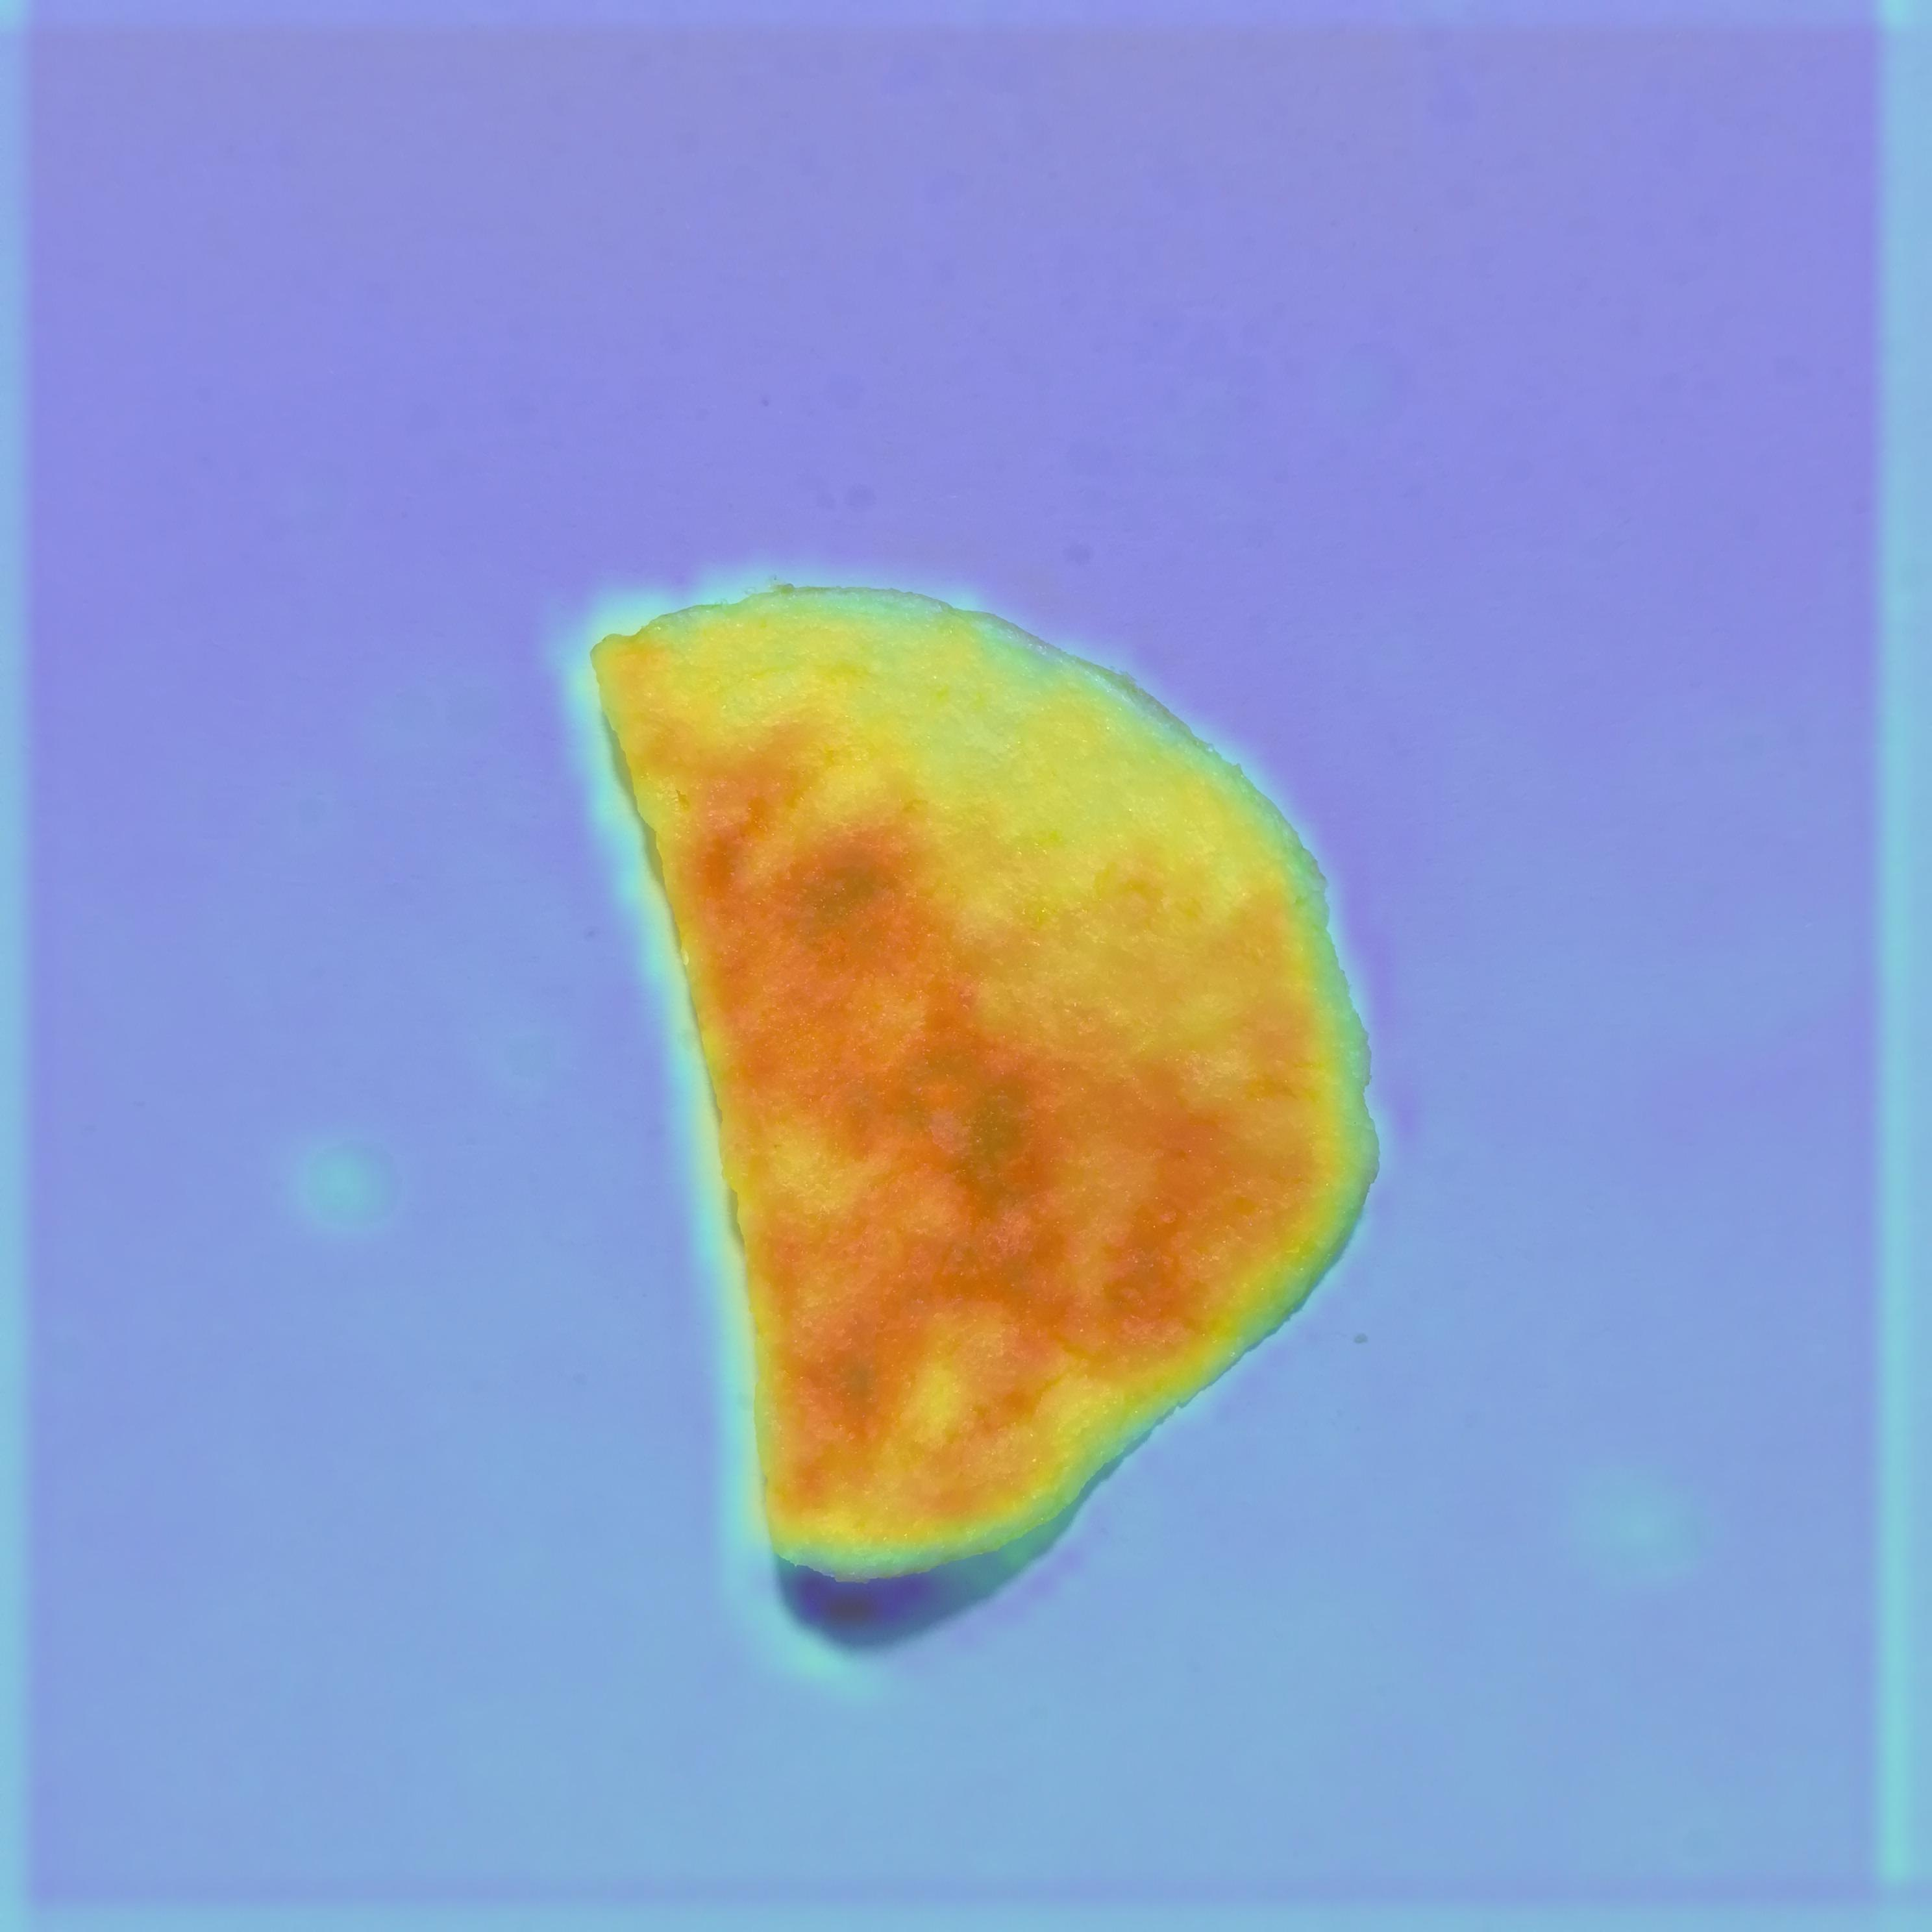

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.5):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

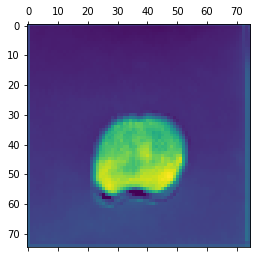

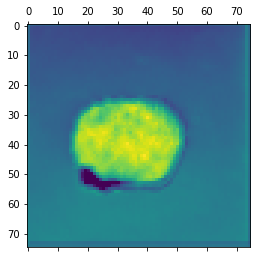

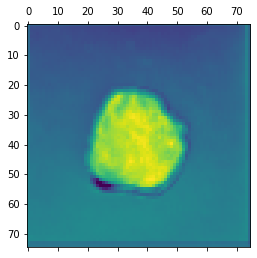

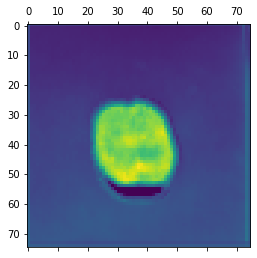

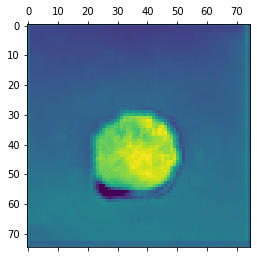

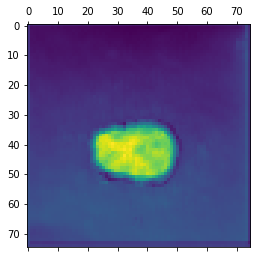

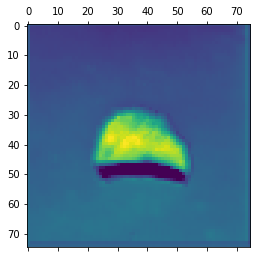

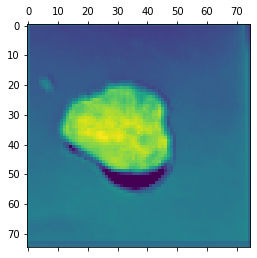

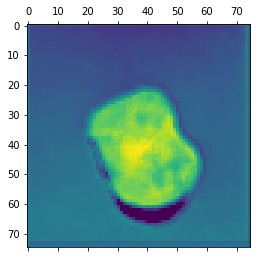

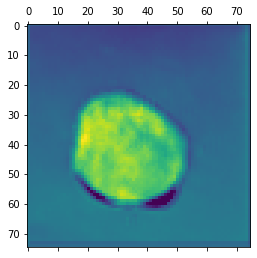

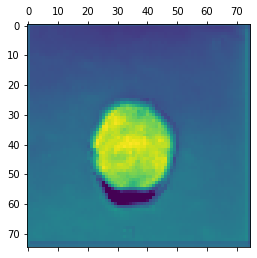

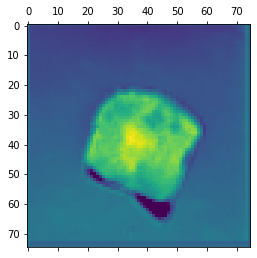

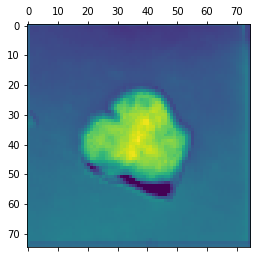

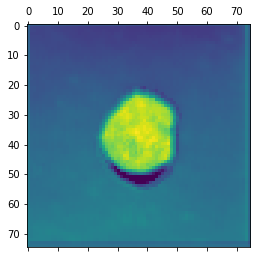

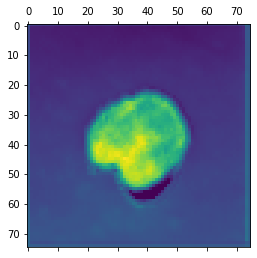

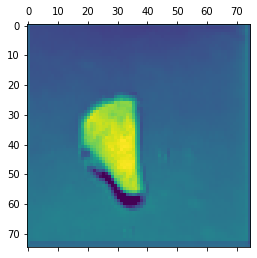

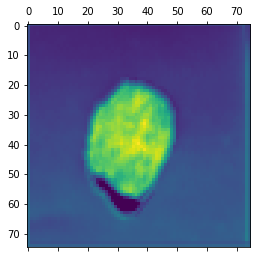

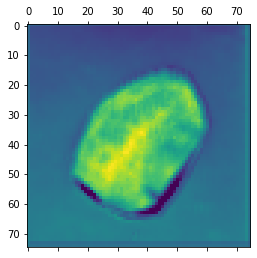

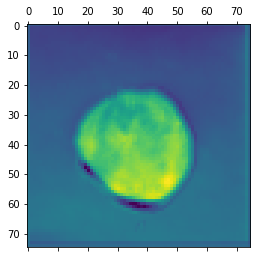

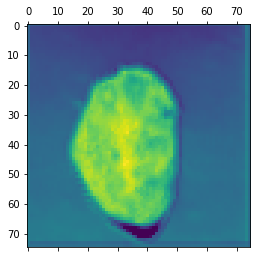

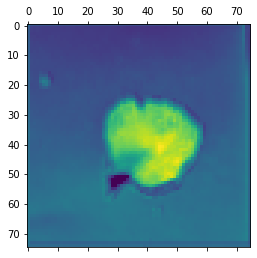

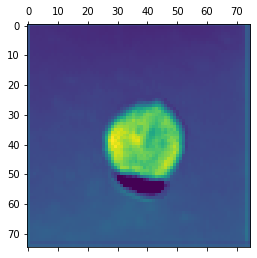

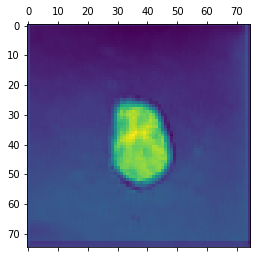

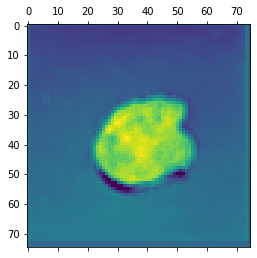

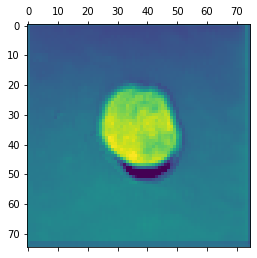

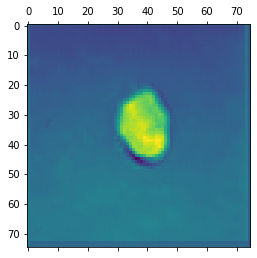

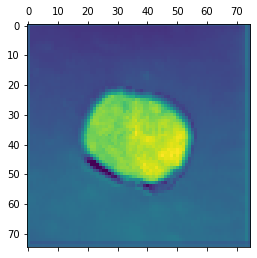

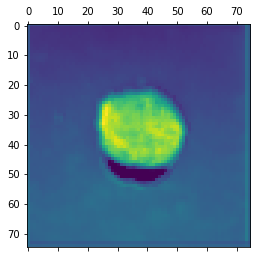

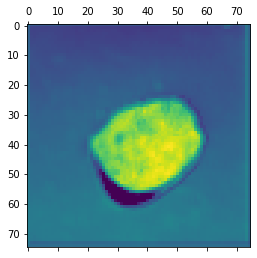

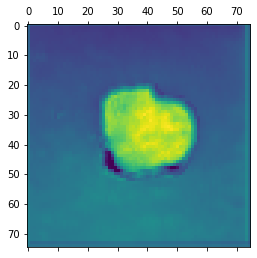

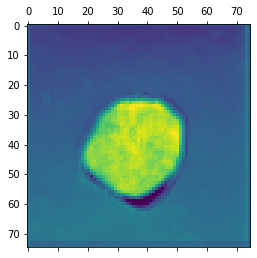

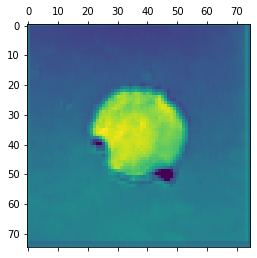

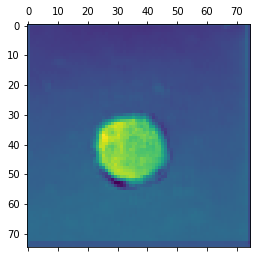

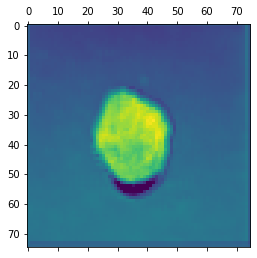

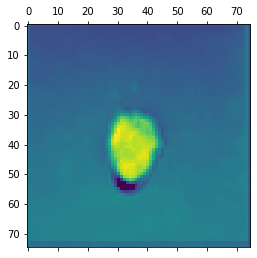

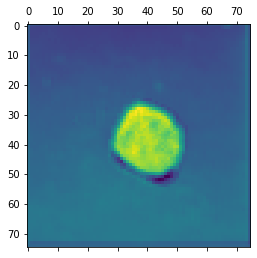

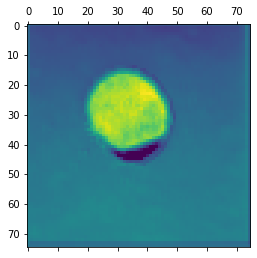

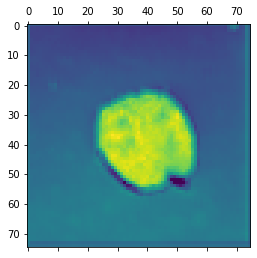

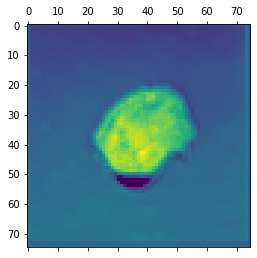

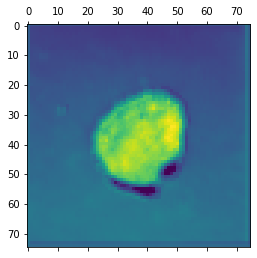

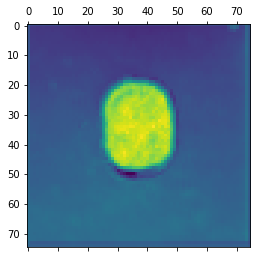

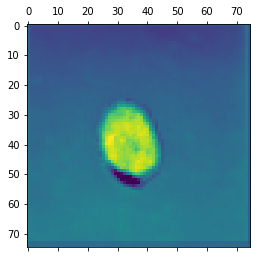

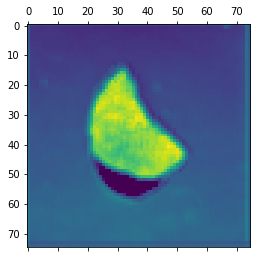

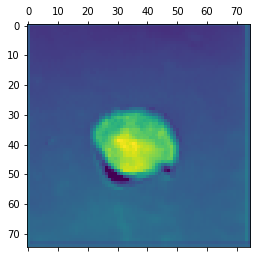

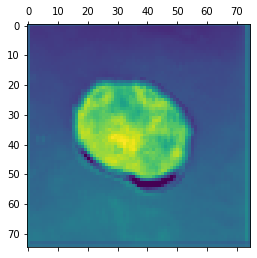

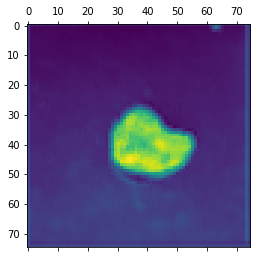

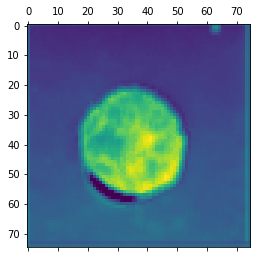

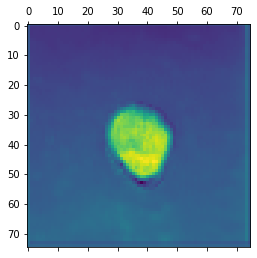

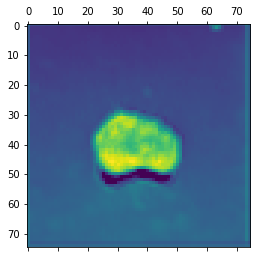

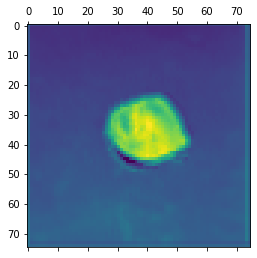

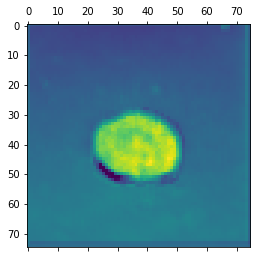

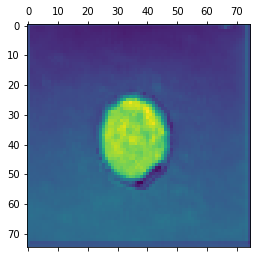

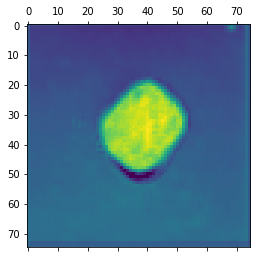

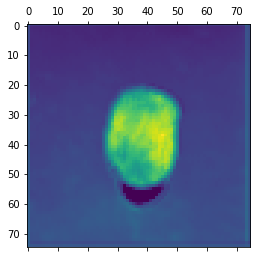

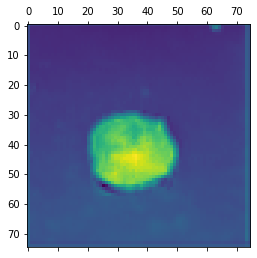

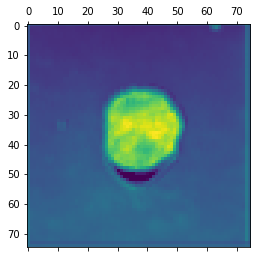

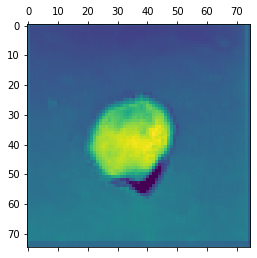

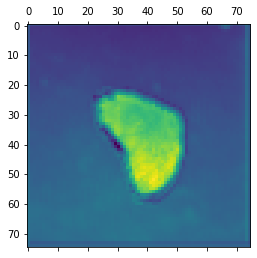

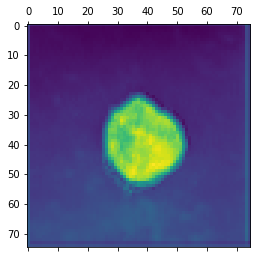

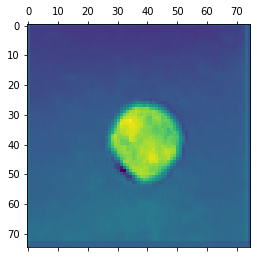

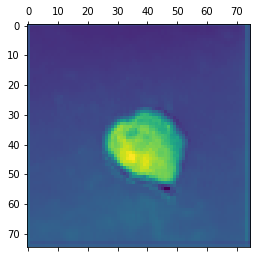

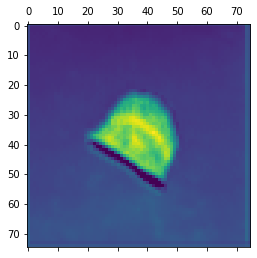

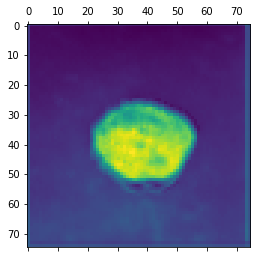

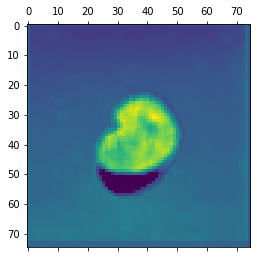

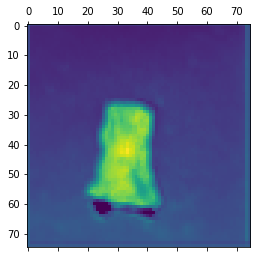

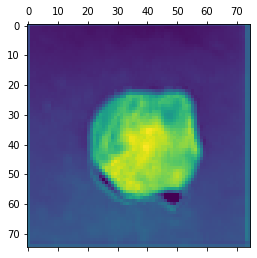

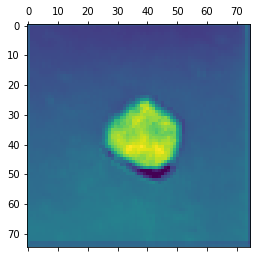

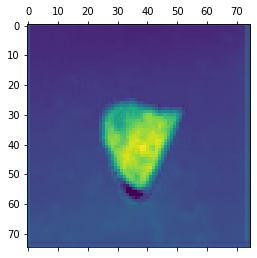

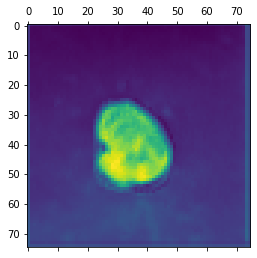

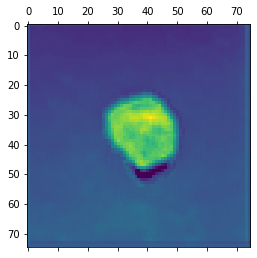

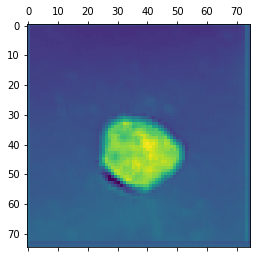

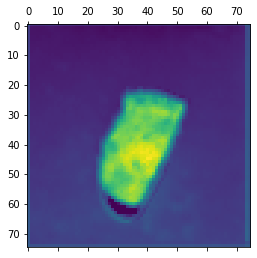

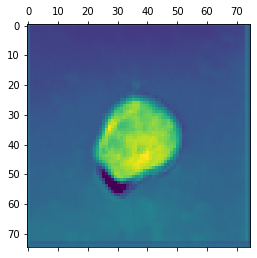

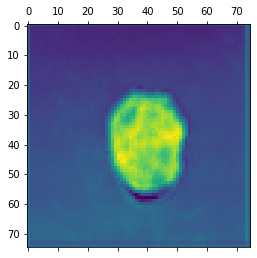

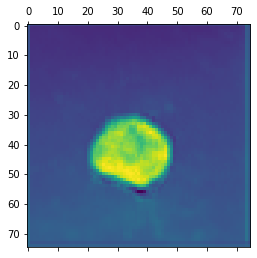

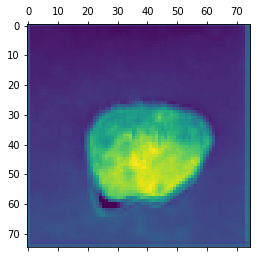

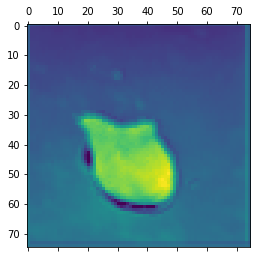

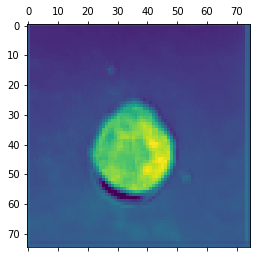

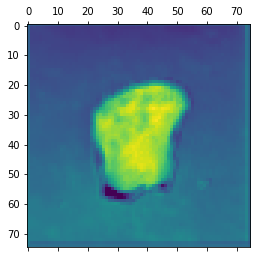

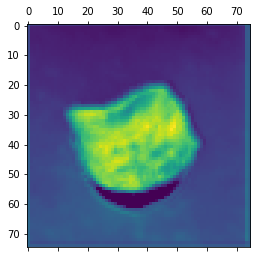

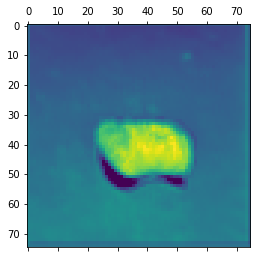

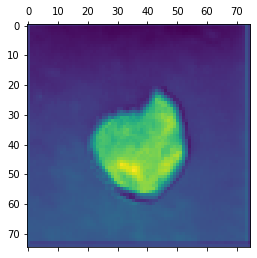

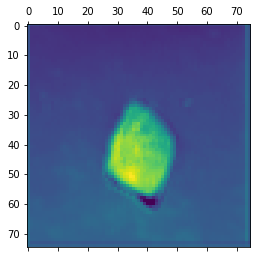

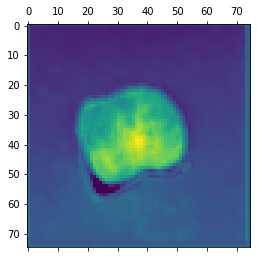

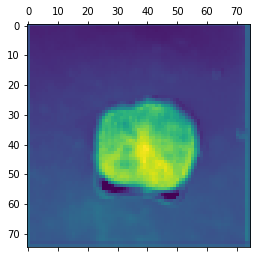

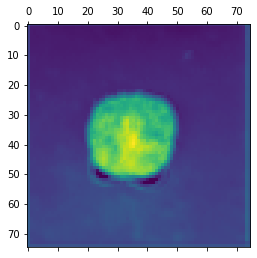

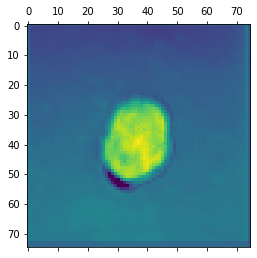

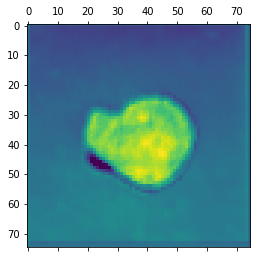

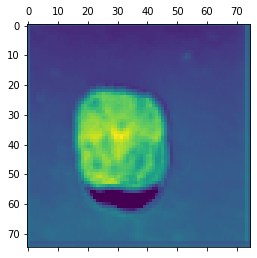

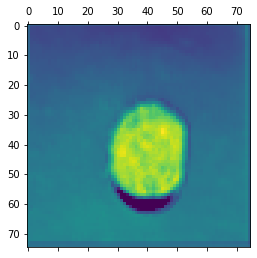

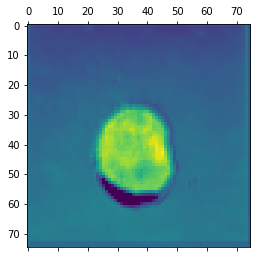

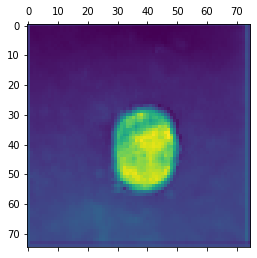

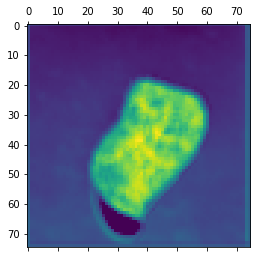

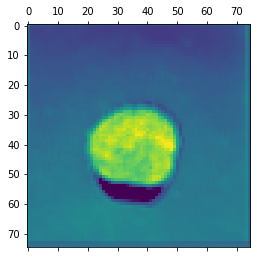

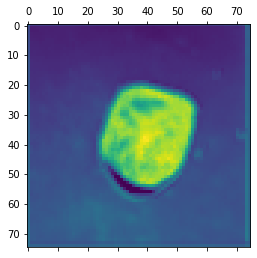

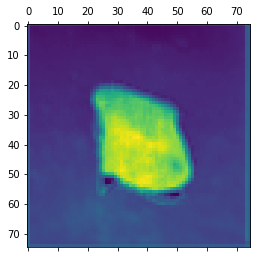

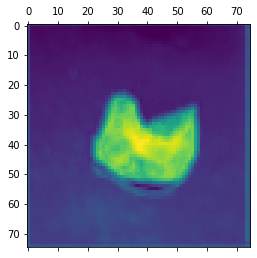

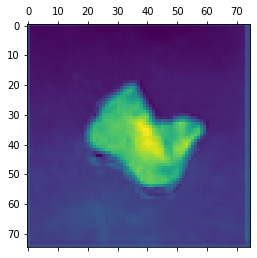

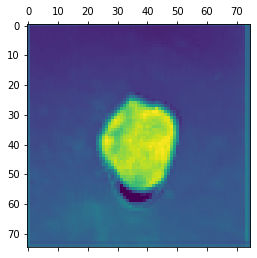

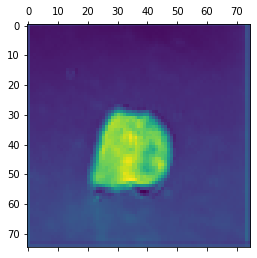

In [ ]:
for filename in os.listdir(test_nd_path):
    # Prepare image
    img_array = (get_img_array(test_nd_path + filename, size=img_size))

    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    #preds = model.predict(img_array)
    #not_defective_pred = preds[0][0]
    #defective_pred = 1 - not_defective_pred
    #if not_defective_pred > defective_pred:
    #    print("Predicted: Not Defective")
    #if not_defective_pred < defective_pred:
    #    print("Predicted: Defective")

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()

In [ ]:
for filename in os.listdir(test_d_path):
  # Prepare image
    img_array = (get_img_array(test_d_path + filename, size=img_size))

    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    #preds = model.predict(img_array)
    #defective_pred = preds[0][0]
    #not_defective_pred = 1 - defective_pred
    #if not_defective_pred > defective_pred:
    #    print("Predicted: Not Defective")
    #if not_defective_pred < defective_pred:
    #    print("Predicted: Defective")

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)